### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings

### **Load dataset**

In [2]:
data = pd.read_csv("road-casualty-statistics-collision.csv", low_memory=False)
data.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,010419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,010419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,010419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,010419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,010419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


### **Breaking down the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

In [4]:
data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          12
location_northing_osgr                         12
longitude                                      12
latitude                                       12
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


Text(0.5, 1.0, 'Missing Values Heatmap')

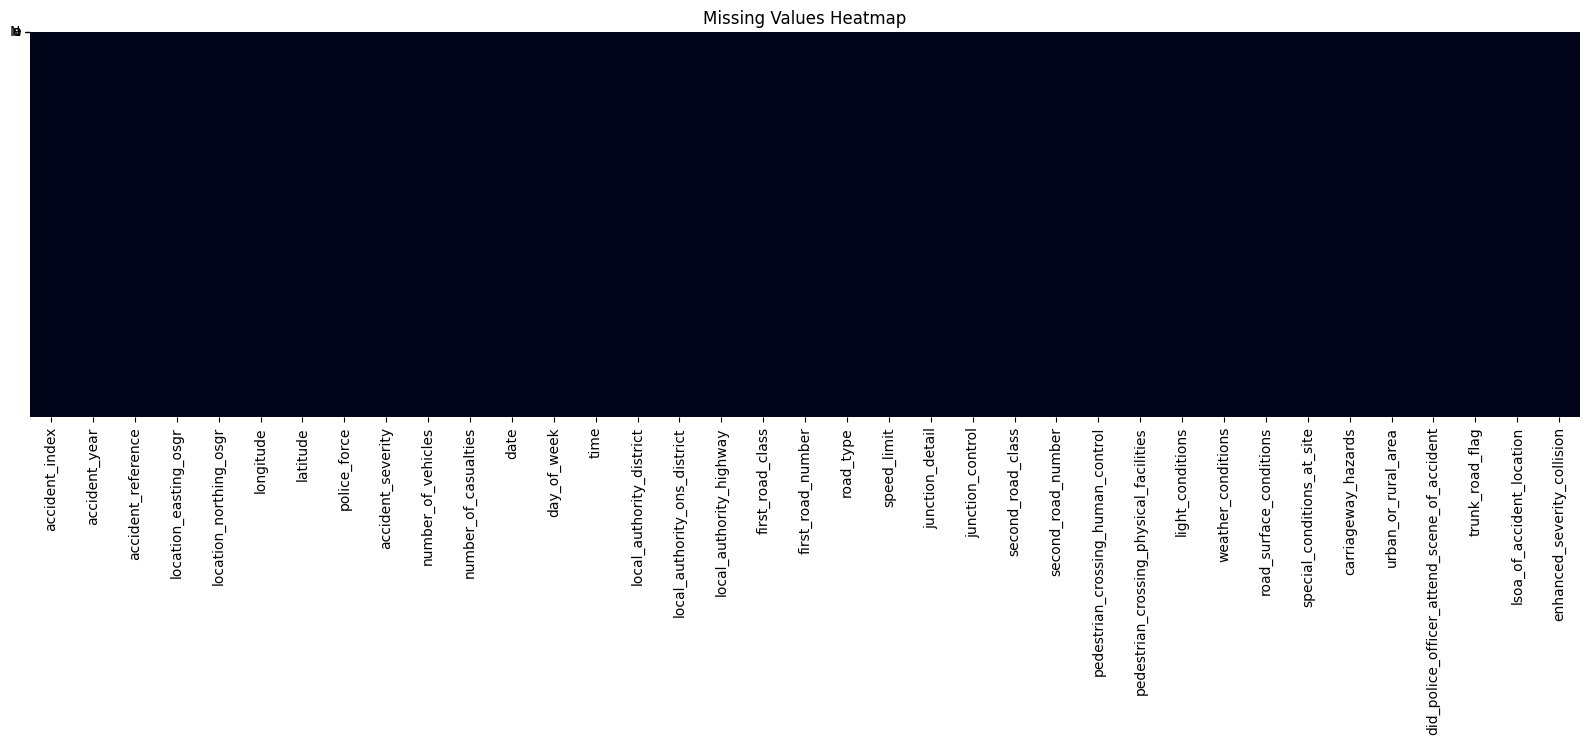

In [5]:
#missingness
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

In [6]:
# Separating the numerical variables from the categorical variables
cat_var=data.select_dtypes(include=[object])
num_var = data.select_dtypes(include=['float','int'])

print(f"Categorical:\n {cat_var.columns}")
print(f"Numerical:\n {num_var.columns}")

Categorical:
 Index(['accident_index', 'accident_reference', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location'],
      dtype='object')
Numerical:
 Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'enhanced_severity_collision'],
      dty

In [7]:
data.shape

(104258, 37)

In [8]:
data.columns.tolist()

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location',
 'enhanced_severity_collision']

### ** Exploratory Data Analysis (EDA)**

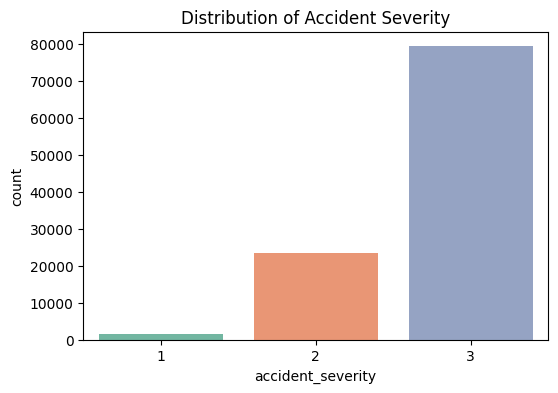

Target class distribution:
 accident_severity
3    79298
2    23438
1     1522
Name: count, dtype: int64


In [9]:
#Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x="accident_severity",
    hue="accident_severity",
    data=data,
    palette="Set2",
    legend=False)
plt.title("Distribution of Accident Severity")
plt.show()

print("Target class distribution:\n", (data["accident_severity"]).value_counts())

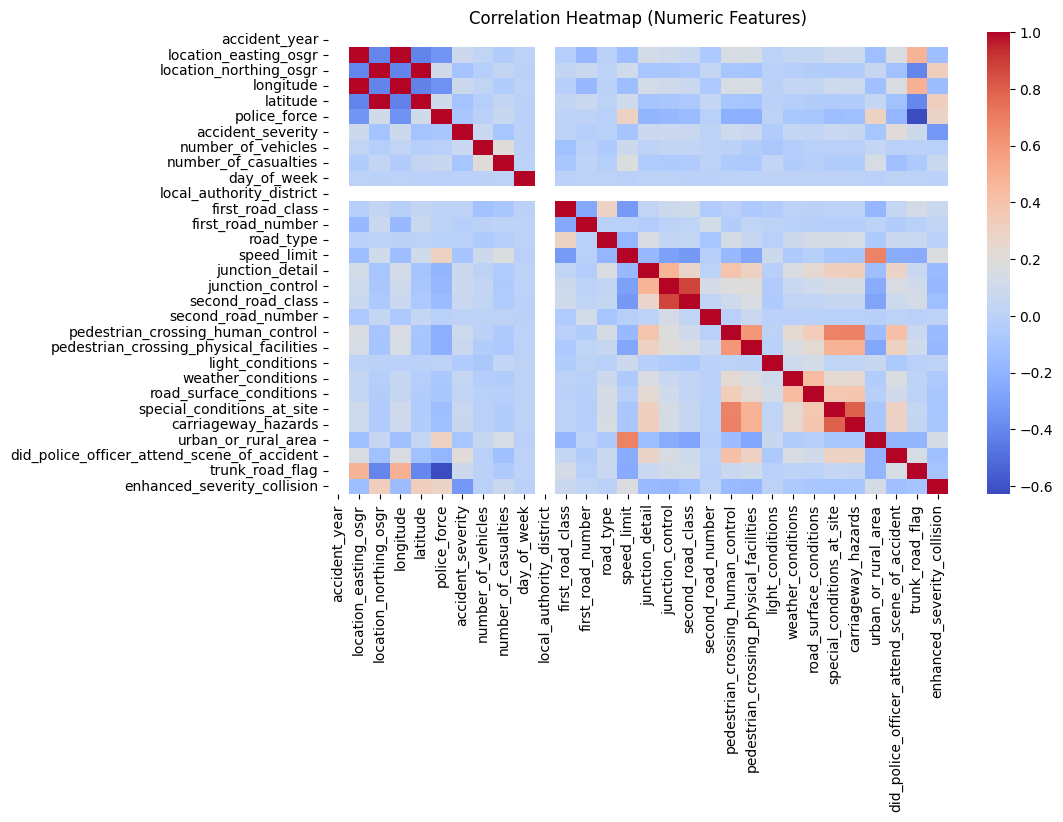

In [10]:
# Correlation matrix (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### **Data Preprocessing**

In [11]:
data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          12
location_northing_osgr                         12
longitude                                      12
latitude                                       12
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [32]:
data.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,010419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,010419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,010419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,010419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,010419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


In [36]:
# Drop irrelevant columns 
drop_cols = [
    "accident_index", "accident_reference", "lsoa_of_accident_location",
    "accident_year", "enhanced_severity_collision", "local_authority_ons_district", 
    "local_authority_district"
    #"location_easting_osgr", "longitude"
    #"location_northing_osgr", "latitude"
]

df = data.drop(columns=drop_cols, errors="ignore")


In [37]:
from sklearn.cluster import KMeans

#Handle date
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["month"] = df["date"].dt.month
# df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)

# Handle location: K-Means clustering
coords = df[["longitude", "latitude"]].dropna()
kmeans = KMeans(n_clusters=8, random_state=42)
df.loc[coords.index, "region_cluster"] = kmeans.fit_predict(coords)

#Drop unused raw columns
df = df.drop(columns=[
    "date", "longitude", "latitude",
    "location_easting_osgr", "location_northing_osgr"
])


In [38]:
# Separating the numerical variables from the categorical variables
cat_col=df.select_dtypes(include=[object])
num_col = df.select_dtypes(include=['float','int'])

print(f"Categorical:\n {cat_col.columns}")
print(f"Numerical:\n {num_col.columns}")

Categorical:
 Index(['time', 'local_authority_highway'], dtype='object')
Numerical:
 Index(['police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'month', 'weekday', 'is_weekend', 'region_cluster'],
      dtype='object')


In [16]:
# Handle missing values: fill with mode for categorical, median for numeric
# Fill numeric columns with median
for col in num_col.columns:
    df[col] = df[col].fillna(df[col].mode())

# Fill categorical columns with mode
for col in cat_col.columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [39]:
df.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_highway,first_road_class,first_road_number,road_type,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,month,weekday,is_weekend,region_cluster
0,1,3,1,1,1,01:24,E09000024,5,0,2,...,2,0,0,1,1,2,1.0,6.0,1,1.0
1,1,3,3,2,1,02:25,E09000010,6,0,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0
2,1,3,2,1,1,03:50,E09000017,3,437,1,...,1,0,0,1,1,2,1.0,6.0,1,1.0
3,1,3,2,1,1,02:13,E09000003,3,5,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0
4,1,3,2,1,1,01:42,E09000032,3,3220,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0


In [40]:
df.isnull().sum()

police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
day_of_week                                        0
time                                               0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                          0
speed_limit                                        0
junction_detail                                    0
junction_control                                   0
second_road_class                                  0
second_road_number                                 0
pedestrian_crossing_human_control                  0
pedestrian_crossing_physical_facilities            0
light_conditions                                   0
weather_conditions                            

In [41]:
df.dtypes

police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
day_of_week                                      int64
time                                            object
local_authority_highway                         object
first_road_class                                 int64
first_road_number                                int64
road_type                                        int64
speed_limit                                      int64
junction_detail                                  int64
junction_control                                 int64
second_road_class                                int64
second_road_number                               int64
pedestrian_crossing_human_control                int64
pedestrian_crossing_physical_facilities          int64
light_conditions                                 int64
weather_co

In [20]:
df.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,month,weekday,is_weekend,region_cluster
0,1,3,1,1,1,01:24,-1,E09000024,E09000024,5,...,2,0,0,1,1,2,1.0,6.0,1,1.0
1,1,3,3,2,1,02:25,-1,E09000010,E09000010,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0
2,1,3,2,1,1,03:50,-1,E09000017,E09000017,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
3,1,3,2,1,1,02:13,-1,E09000003,E09000003,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
4,1,3,2,1,1,01:42,-1,E09000032,E09000032,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0


In [21]:
cat_var.columns

Index(['accident_index', 'accident_reference', 'date', 'time',
       'local_authority_ons_district', 'local_authority_highway',
       'lsoa_of_accident_location'],
      dtype='object')

In [22]:
cat_col.columns

Index(['time', 'local_authority_ons_district', 'local_authority_highway'], dtype='object')

In [23]:
df.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,month,weekday,is_weekend,region_cluster
0,1,3,1,1,1,01:24,-1,E09000024,E09000024,5,...,2,0,0,1,1,2,1.0,6.0,1,1.0
1,1,3,3,2,1,02:25,-1,E09000010,E09000010,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0
2,1,3,2,1,1,03:50,-1,E09000017,E09000017,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
3,1,3,2,1,1,02:13,-1,E09000003,E09000003,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
4,1,3,2,1,1,01:42,-1,E09000032,E09000032,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0


In [24]:
# Columns to inspect
categorical_cols = [
    "day_of_week", "road_type", "junction_detail", "junction_control",
    "pedestrian_crossing_human_control", "pedestrian_crossing_physical_facilities",
    "light_conditions", "weather_conditions", "road_surface_conditions",
    "special_conditions_at_site", "carriageway_hazards",
    "urban_or_rural_area", "did_police_officer_attend_scene_of_accident",
    "trunk_road_flag"
]

# Extract unique values for each categorical column
encoded_values = {col: df[col].unique() for col in categorical_cols}
encoded_values


{'day_of_week': array([1, 2, 3, 4, 5, 6, 7]),
 'road_type': array([2, 6, 1, 3, 9, 7]),
 'junction_detail': array([ 9,  3,  1,  8,  0,  6,  2,  7, 99,  5, -1]),
 'junction_control': array([ 4, -1,  2,  9,  1,  3]),
 'pedestrian_crossing_human_control': array([ 2,  0,  1,  9, -1]),
 'pedestrian_crossing_physical_facilities': array([ 5,  1,  0,  4,  9,  8,  7, -1]),
 'light_conditions': array([4, 1, 6, 5, 7]),
 'weather_conditions': array([8, 1, 9, 2, 5, 4, 3, 7, 6]),
 'road_surface_conditions': array([ 2,  1,  9,  4,  3,  5, -1]),
 'special_conditions_at_site': array([ 0,  9,  4,  7,  3,  1,  2,  5,  6, -1]),
 'carriageway_hazards': array([ 0,  2,  9,  7,  1,  6,  3, -1]),
 'urban_or_rural_area': array([ 1,  2, -1,  3]),
 'did_police_officer_attend_scene_of_accident': array([1, 3, 2]),
 'trunk_road_flag': array([ 2,  1, -1])}

In [25]:
df.head()

,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,month,weekday,is_weekend,region_cluster
0,1,3,1,1,1,01:24,-1,E09000024,E09000024,5,...,2,0,0,1,1,2,1.0,6.0,1,1.0
1,1,3,3,2,1,02:25,-1,E09000010,E09000010,6,...,1,0,0,1,1,2,1.0,6.0,1,1.0
2,1,3,2,1,1,03:50,-1,E09000017,E09000017,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
3,1,3,2,1,1,02:13,-1,E09000003,E09000003,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0
4,1,3,2,1,1,01:42,-1,E09000032,E09000032,3,...,1,0,0,1,1,2,1.0,6.0,1,1.0


In [26]:
df.columns.tolist()

['police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'month',
 'weekday',
 'is_weekend',
 'region_cluster']

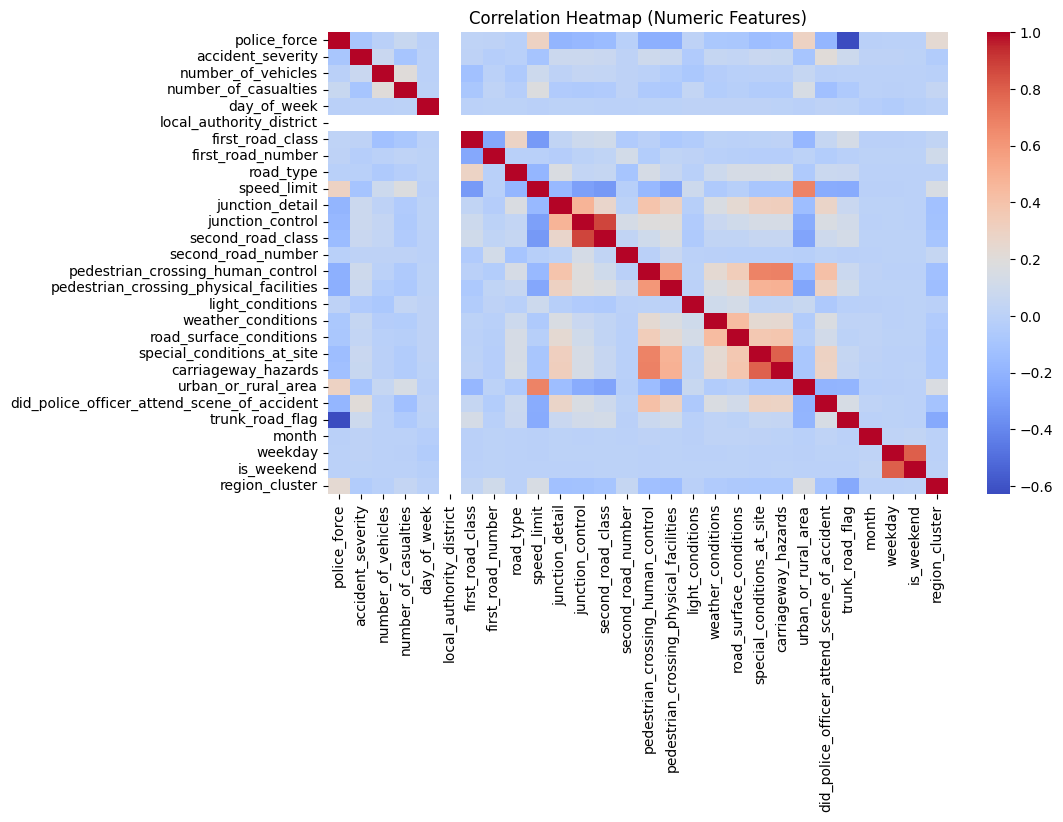

In [30]:
# Correlation matrix (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [27]:
# # Encode categorical features

# # from sklearn.preprocessing import LabelEncoder

# # label_encoders = {}
# # for col in df.select_dtypes(include=["object"]).columns:
# #     le = LabelEncoder()
# #     df[col] = le.fit_transform(df[col])
# #     label_encoders[col] = le

# # Features and target
# X = df.drop("accident_severity", axis=1)
# y = df["accident_severity"]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [28]:
# Check unique values for all object (categorical) columns
# Exclude Loan_ID
for col in data.select_dtypes(include="object").columns.drop("Loan_ID"):
    print(f"{col}: {data[col].unique()}")
    print()

KeyError: "['Loan_ID'] not found in axis"